# Lab Assignment 2 - Part A: Linear Regression
Please refer to the `README.pdf` for full laboratory instructions.

## Problem Statement
A dataset is included related to red and white vinho verde wine samples, from the north of Portugal. In this exercise, we look at a subset of the data and try to **predict wine's citric acid level based on other features**.

### Dataset Description
Input variables (based on physicochemical tests):
1. fixed acidity
2. volatile acidity
3. **citric acid** (TARGET - what we want to predict)
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol
12. quality (score between 0 and 10)

### Your Tasks
1. **Implement linear regression** from scratch using least-squares (you may use `np.linalg.lstsq()`)
2. Start with 'alcohol' and 'density' as features. **Find a 3rd feature** that improves prediction the most
3. **Find the 4th feature**. Analyze what happens with all features
4. **Provide plots** comparing predictions vs actual values

## Setup: Load the Dataset
The data is provided through `ucimlrepo`. Install and import required packages below.

In [2]:
!pip install ucimlrepo

  Using cached ucimlrepo-0.0.7-py3-none-any.whl.metadata (5.5 kB)
Using cached ucimlrepo-0.0.7-py3-none-any.whl (8.0 kB)


In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
# We take 100 samples and predict the citric acid number through various features
X = wine_quality.data.features[:100]
X = X.drop(columns=['citric_acid'])
y = wine_quality.data.features[:100]['citric_acid']
print(X.keys())

Index(['fixed_acidity', 'volatile_acidity', 'residual_sugar', 'chlorides',
       'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH',
       'sulphates', 'alcohol'],
      dtype='object')


### Write and Run Your Own Code

In [4]:
#Library declarations
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# Task 1: Implement Linear Regression
# Hint: You can use np.linalg.lstsq() or implement the normal equation: w = (X^T X)^{-1} X^T y

def linear_regression(X, y):
    """
    Implement linear regression using least-squares.
    
    Parameters:
    -----------
    X : numpy array of shape (n_samples, n_features)
    y : numpy array of shape (n_samples,)
    
    Returns:
    --------
    coefficients : numpy array
    """
    # TODO: Implement this function
    X = np.asarray(X)
    y = np.asarray(y).reshape(-1)

    # Add bias term (intercept)
    X_design = np.hstack([np.ones((X.shape[0], 1)), X])

    # Least-squares solution
    coefficients, *_ = np.linalg.lstsq(X_design, y, rcond=None)
    return coefficients


def compute_error(X, y, coefficients):
    """
    Compute the prediction error.
    
    Returns:
    --------
    error : float (e.g., RMSE or L2 norm)
    """
    # TODO: Implement this function
    y = np.asarray(y).reshape(-1)
    X = np.asarray(X)
    X_design = np.hstack([np.ones((X.shape[0], 1)), X])
    y_hat = X_design @ coefficients
    rmse = np.sqrt(np.mean((y_hat - y) ** 2))
    return rmse


## Task 2: Start with Two Features
Use 'alcohol' and 'density' as initial features. Train your model and compute the error.

In [18]:
# Create feature matrix with 'alcohol' and 'density'
X_2features = np.vstack((X['alcohol'], X['density'])).T

# TODO: Train model and compute error
model_2 = linear_regression(X_2features, y)
error_2 = compute_error(X_2features, y, model_2)
print(f"Error with 2 features: {error_2:.4f}")


Error with 2 features: 0.1686


## Task 3: Find the 3rd Feature
Try adding each remaining feature one at a time. Which one improves the model the most?

**Hint**: You might want to look at correlations between features.


In [25]:
# TODO: Try each remaining feature and find the best 3rd feature
# for key in X.keys():
#     if key not in ['alcohol', 'density']:
#         X_new = np.vstack((X['alcohol'], X['density'], X[key])).T
#         # Train model and compute error
#         # Print results
base_feats = ['alcohol', 'density']
best_3rd = None
best_3_err = np.inf
all_3_results = []

for key in X.keys():
    if key not in base_feats:
        X_3 = np.vstack((X['alcohol'], X['density'], X[key])).T
        model_3_tmp = linear_regression(X_3, y)
        err_3_tmp = compute_error(X_3, y, model_3_tmp)

        all_3_results.append((key, err_3_tmp))
        if err_3_tmp < best_3_err:
            best_3_err = err_3_tmp
            best_3rd = key

print(f"\nBest 3rd feature = {best_3rd}, RMSE={best_3_err:.6f}")
base3_feats = ['alcohol', 'density', best_3rd]
X_3features = np.vstack((X['alcohol'], X['density'], X[best_3rd])).T
model_3 = linear_regression(X_3features, y)



Best 3rd feature = volatile_acidity, RMSE=0.132040


## Task 4: Find the 4th Feature and Full Model
Continue the analysis. What is the best 4th feature? What happens when you use all features?


In [26]:
# TODO: Find the best 4th feature
best_4th = None
best_4_err = np.inf
all_4_results = []

for key in X.keys():
    if key not in base3_feats:
        X_4 = np.vstack((X[base3_feats[0]], X[base3_feats[1]], X[base3_feats[2]], X[key])).T
        model_4_tmp = linear_regression(X_4, y)
        err_4_tmp = compute_error(X_4, y, model_4_tmp)

        all_4_results.append((key, err_4_tmp))
        if err_4_tmp < best_4_err:
            best_4_err = err_4_tmp
            best_4th = key
print(f"\nBest 4th feature = {best_4th}, RMSE={best_4_err:.6f}")
X_4features = np.vstack((X['alcohol'], X['density'], X[best_3rd], X[best_4th])).T
model_4 = linear_regression(X_4features, y)

# TODO: Train full model with all features
X_all = np.vstack([X[key] for key in X.keys()]).T
model_full = linear_regression(X_all, y)
err_all = compute_error(X_all, y, model_full)
print(f"RMSE of full model = {err_all:.6f}")



Best 4th feature = fixed_acidity, RMSE=0.124159
RMSE of full model = 0.105519


## Task 5: Visualization
Create plots comparing model predictions vs actual values for different feature combinations.


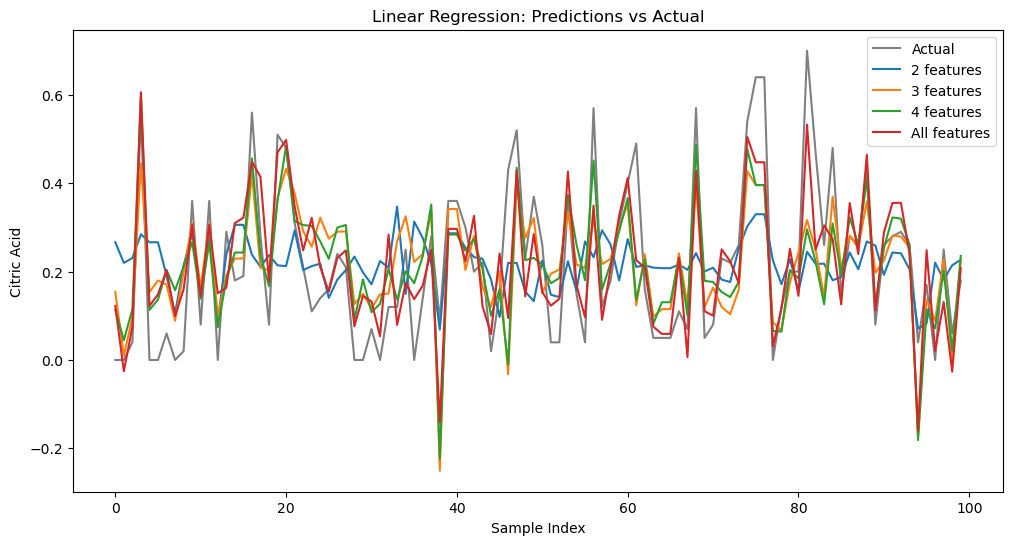

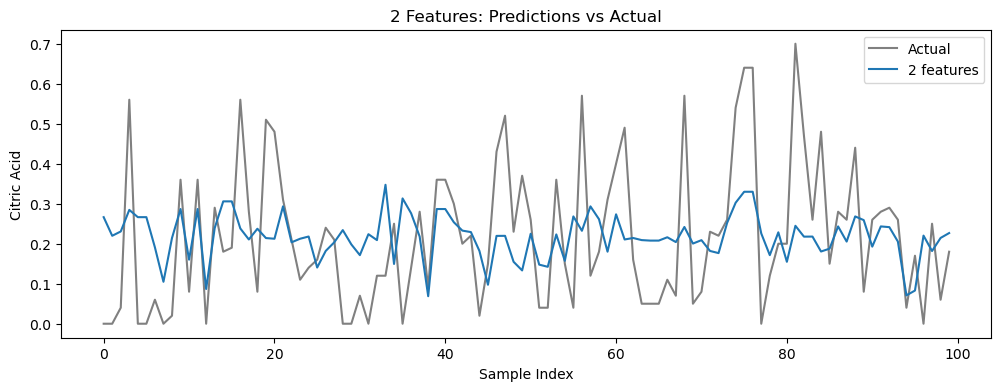

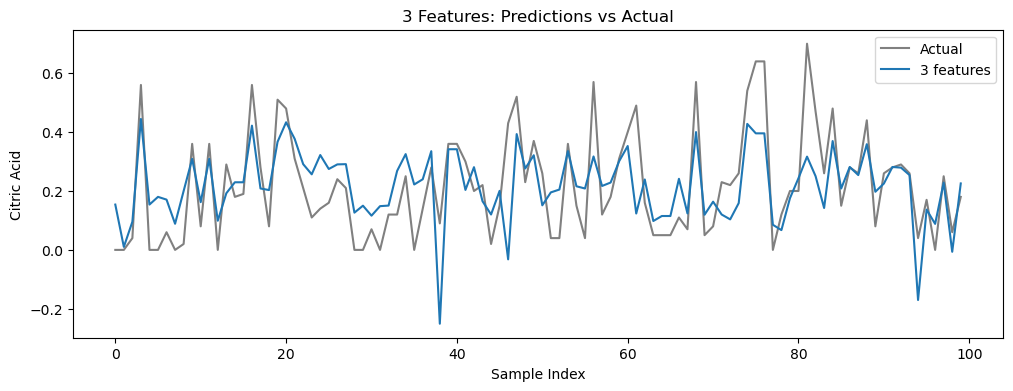

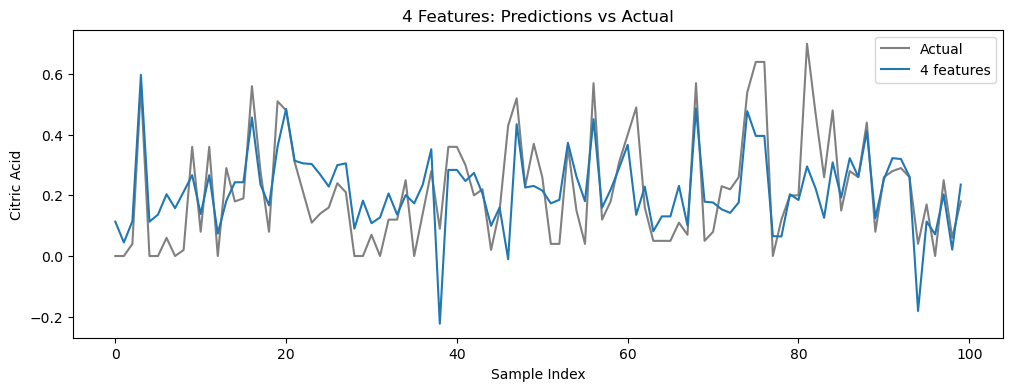

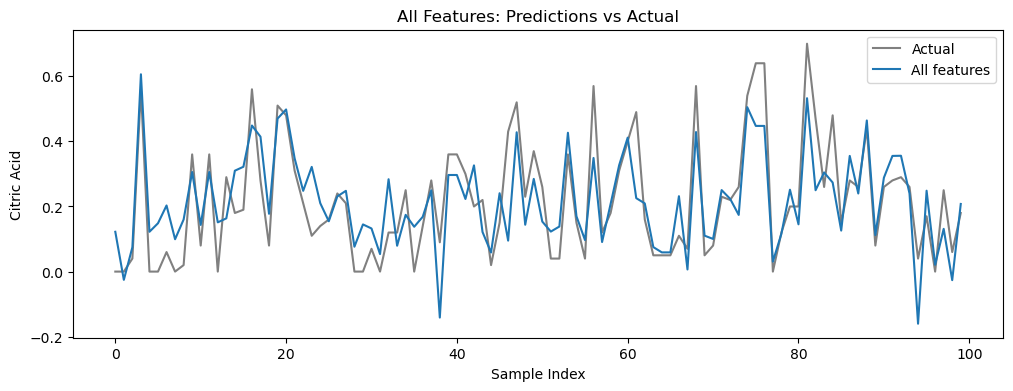

In [28]:
# TODO: Create comparison plots
# Example:
# plt.figure(figsize=(12, 6))
# plt.plot(y, label='Actual', color='gray')
# plt.plot(X_2features @ model_2, label='2 features')
# plt.plot(X_3features @ model_3, label='3 features')
# plt.legend()
# plt.xlabel('Sample Index')
# plt.ylabel('Citric Acid')
# plt.title('Linear Regression: Predictions vs Actual')
# plt.show()
X2_design = np.hstack([np.ones((X_2features.shape[0], 1)), X_2features])
X3_design = np.hstack([np.ones((X_3features.shape[0], 1)), X_3features])
X4_design = np.hstack([np.ones((X_4features.shape[0], 1)), X_4features])
Xall_design = np.hstack([np.ones((X_all.shape[0], 1)), X_all])

plt.figure(figsize=(12, 6))
plt.plot(y, label='Actual', color='gray')
plt.plot(X2_design @ model_2, label='2 features')
plt.plot(X3_design @ model_3, label='3 features')
plt.plot(X4_design @ model_4, label='4 features')
plt.plot(Xall_design @ model_full, label='All features')
plt.legend()
plt.xlabel('Sample Index')
plt.ylabel('Citric Acid')
plt.title('Linear Regression: Predictions vs Actual')
plt.show()

# 1. 2 features
plt.figure(figsize=(12, 4))
plt.plot(y, label='Actual', color='gray')
plt.plot(X2_design @ model_2, label='2 features')
plt.legend()
plt.xlabel('Sample Index')
plt.ylabel('Citric Acid')
plt.title('2 Features: Predictions vs Actual')
plt.show()

# 2. 3 features
plt.figure(figsize=(12, 4))
plt.plot(y, label='Actual', color='gray')
plt.plot(X3_design @ model_3, label='3 features')
plt.legend()
plt.xlabel('Sample Index')
plt.ylabel('Citric Acid')
plt.title('3 Features: Predictions vs Actual')
plt.show()

# 3. 4 features
plt.figure(figsize=(12, 4))
plt.plot(y, label='Actual', color='gray')
plt.plot(X4_design @ model_4, label='4 features')
plt.legend()
plt.xlabel('Sample Index')
plt.ylabel('Citric Acid')
plt.title('4 Features: Predictions vs Actual')
plt.show()

# 4. All features
plt.figure(figsize=(12, 4))
plt.plot(y, label='Actual', color='gray')
plt.plot(Xall_design @ model_full, label='All features')
plt.legend()
plt.xlabel('Sample Index')
plt.ylabel('Citric Acid')
plt.title('All Features: Predictions vs Actual')
plt.show()

## Summary and Discussion

### Results Table
| Model | Features | Error |
|-------|----------|-------|
| Model 1 | alcohol, density | 0.1686 |
| Model 2 | alcohol, density, volatile acidity | 0.132040 |
| Model 3 | alcohol, density, volatile acidity, fixed acidity | 0.124159 |
| Full Model | all features | 0.105519 |

### Discussion
*Write your analysis here:*
- Which features are most important for predicting citric acid?

    From the results table, alcohol and density form a reasonable baseline model, but their predictive power is limited (error ≈ 0.1686). When volatile acidity is added as a third feature, the error drops significantly to approximately 0.1320, indicating that volatile acidity is a highly informative feature for predicting citric acid. Adding fixed acidity as the fourth feature further reduces the error to 0.1242, showing that it also contributes useful information, although the improvement is smaller compared to volatile acidity. Overall, volatile acidity appears to be the most important additional feature beyond alcohol and density, followed by fixed acidity.

- Does adding more features always improve the model?

    In this experiment, adding more features does lead to a lower training error, as shown by the gradual decrease in error from the 2-feature model to the full-feature model. However, the magnitude of improvement diminishes as more features are added. For example, adding volatile acidity yields a large improvement, while adding fixed acidity results in a smaller gain. This suggests that while additional features can improve performance, not all features contribute equally, and beyond a certain point the benefit of adding more features may be marginal. In practice, adding too many features could also increase the risk of overfitting.

- What did you learn from this exercise?

    This exercise demonstrates how feature selection plays a crucial role in linear regression performance. A small number of well-chosen features can significantly improve predictions compared to a simple baseline model. It also highlights the importance of systematically evaluating feature combinations rather than assuming that more features automatically lead to better models. Finally, implementing linear regression from scratch helped reinforce the understanding of least-squares optimization, error measurement, and the relationship between model complexity and predictive performance.
